In [2]:
import pandas as pd
import numpy as np
import torch
import pytorch_transformers

In [16]:
train_df = pd.read_pickle('train_processed.pkl')
train_df.head()

,input,label,pab_pos
0,"[11199, 10093, 3877, 1011, 1011, 2209, 1996, 2...",1.0,"[61, 41, 44]"
1,"[2002, 3473, 2039, 1999, 6473, 2669, 1010, 430...",1.0,"[60, 50, 53]"
2,"[2002, 2018, 2042, 20847, 2000, 3519, 1010, 20...",2.0,"[62, 40, 56]"
3,"[1996, 2783, 2372, 1997, 4126, 2031, 2036, 286...",2.0,"[66, 35, 70]"
4,"[2014, 4203, 10768, 3850, 2834, 1999, 2384, 20...",2.0,"[104, 53, 71]"


## Do sequence length and label analysis

In [23]:
train_df['seq_length'] = train_df.apply(lambda x: len(x['input']), axis = 1)
train_df['max_pab'] = train_df.apply(lambda x: max(x['pab_pos']), axis = 1)
train_df.head()

,input,label,pab_pos,seq_length,max_pab
0,"[11199, 10093, 3877, 1011, 1011, 2209, 1996, 2...",1.0,"[61, 41, 44]",92,61
1,"[2002, 3473, 2039, 1999, 6473, 2669, 1010, 430...",1.0,"[60, 50, 53]",87,60
2,"[2002, 2018, 2042, 20847, 2000, 3519, 1010, 20...",2.0,"[62, 40, 56]",128,62
3,"[1996, 2783, 2372, 1997, 4126, 2031, 2036, 286...",2.0,"[66, 35, 70]",82,70
4,"[2014, 4203, 10768, 3850, 2834, 1999, 2384, 20...",2.0,"[104, 53, 71]",154,104


In [20]:
train_df['seq_length'].describe()

count    2000.000000
mean       95.199500
std        28.793406
min        26.000000
25%        76.000000
50%        91.000000
75%       109.250000
max       346.000000
Name: seq_length, dtype: float64

In [24]:
train_df['max_pab'].describe()

count    2000.000000
mean       75.743000
std        23.998727
min        11.000000
25%        62.000000
50%        73.000000
75%        86.250000
max       308.000000
Name: max_pab, dtype: float64

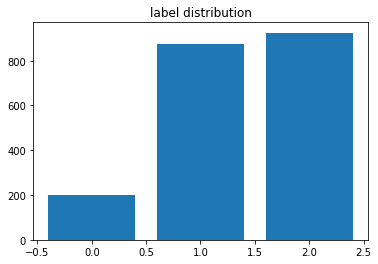

In [41]:
import matplotlib.pyplot as plt 
label_data = train_df.groupby('label')['label'].count()
plt.bar(label_data.keys(),label_data.values)
plt.title('label distribution')
plt.show()

In [39]:
label_data.keys()

Float64Index([0.0, 1.0, 2.0], dtype='float64', name='label')

In [27]:
train_df.groupby('label')['seq_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,201.0,102.542289,31.359838,32.0,83.00,100.0,117.0,249.0
1.0,874.0,93.409611,27.105863,26.0,75.25,91.0,109.0,203.0
2.0,925.0,95.295135,29.526209,26.0,76.00,91.0,109.0,346.0
